# Audio Data
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Aagam0812/DataMining/blob/main/Assignment9/Audio.ipynb)

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


  # Step: 1 Data Loading and Initial Exploration:
  I'll start by unzipping the uploaded file and checking the directory structure. Then, I'll load a few audio files and perform an initial inspection.

In [2]:
import os
import zipfile

# Define the path to the zip file and the extraction directory
zip_path = '/content/gdrive/MyDrive/DataMining/AudioMNIST.zip'
extract_dir = '/content/gdrive/MyDrive/DataMining/audio_mnist'

# # Unzip the archive
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# List the first few files in the directory to understand the structure
extracted_files = os.listdir(extract_dir)
extracted_files[:10]  # Display the first 10 filenames


['.gitignore',
 'README.md',
 '__init__.py',
 'acquire_data',
 'metadata.py',
 'pip_requirements.txt',
 'recordings',
 'utils']

In [3]:
# Define the path to the recordings directory
recordings_dir = os.path.join(extract_dir, 'recordings')

# List the first few files in the recordings directory to understand the structure
recording_files = os.listdir(recordings_dir)
recording_files[:10]  # Display the first 10 filenames


['6_theo_0.wav',
 '6_theo_1.wav',
 '6_theo_10.wav',
 '6_theo_11.wav',
 '6_theo_12.wav',
 '6_theo_13.wav',
 '6_theo_14.wav',
 '6_theo_15.wav',
 '6_theo_16.wav',
 '6_theo_17.wav']

The recordings directory contains audio files in WAV format, and the file names appear to follow a pattern where the first character is the digit label, followed by an underscore, the person's name, another underscore, and then a sequence number.

For example, 0_george_0.wav corresponds to the digit "0", spoken by "george", and is the first recording for this combination.

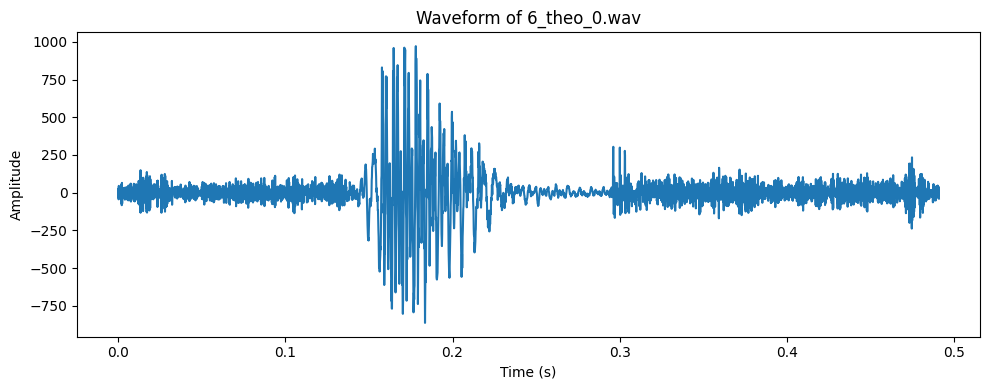

In [5]:
import matplotlib.pyplot as plt
import wave
import numpy as np
file_path = os.path.join("/content/gdrive/MyDrive/DataMining/audio_mnist/recordings", recording_files[0])

def load_wav_file(file_path):
    """Load a WAV file and return the samples and sample rate."""
    with wave.open(file_path, 'r') as wav_file:
        n_channels, sampwidth, framerate, n_frames, comptype, compname = wav_file.getparams()
        frames = wav_file.readframes(n_frames)
        samples = np.frombuffer(frames, dtype=np.int16)

        # If stereo, take the mean of the two channels to make it mono
        if n_channels == 2:
            samples = (samples[::2] + samples[1::2]) / 2
    return samples, framerate

# Load the audio file using the defined function
samples, sample_rate = load_wav_file(file_path)

# Visualize the audio waveform
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(samples) / sample_rate, num=len(samples)), samples)
plt.title(f'Waveform of {recording_files[0]}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


We have successfully parsed the filenames and extracted the labels, speaker names, and file sizes. The resulting DataFrame contains the following columns:

* filename: The name of the audio file.
* label: The digit label extracted from the filename.
* speaker: The name of the speaker extracted from the filename.
* sample rate:
* duration:
* path: The full path to the audio file.

  # Step 2: Exploratory Data Analysis (EDA)
   This step will involve visualizing the audio signals, understanding the data distribution, and performing basic statistical analysis.

For the EDA, we will:

* Parse the filenames to extract labels and speaker names.
* Analyze the distribution of labels and speakers.
* Visualize the waveforms of random audio samples from each label to understand any patterns or variations.
* Analyze the duration distribution of the audio files.

In [7]:
# Parsing the filenames to extract labels and speaker names
labels = [int(file.split('_')[0]) for file in recording_files]
speakers = [file.split('_')[1] for file in recording_files]

# Creating a DataFrame for easier analysis
import pandas as pd

df_audio = pd.DataFrame({
    'filename': recording_files,
    'label': labels,
    'speaker': speakers
})

df_audio.head()


,filename,label,speaker
0,6_theo_0.wav,6,theo
1,6_theo_1.wav,6,theo
2,6_theo_10.wav,6,theo
3,6_theo_11.wav,6,theo
4,6_theo_12.wav,6,theo


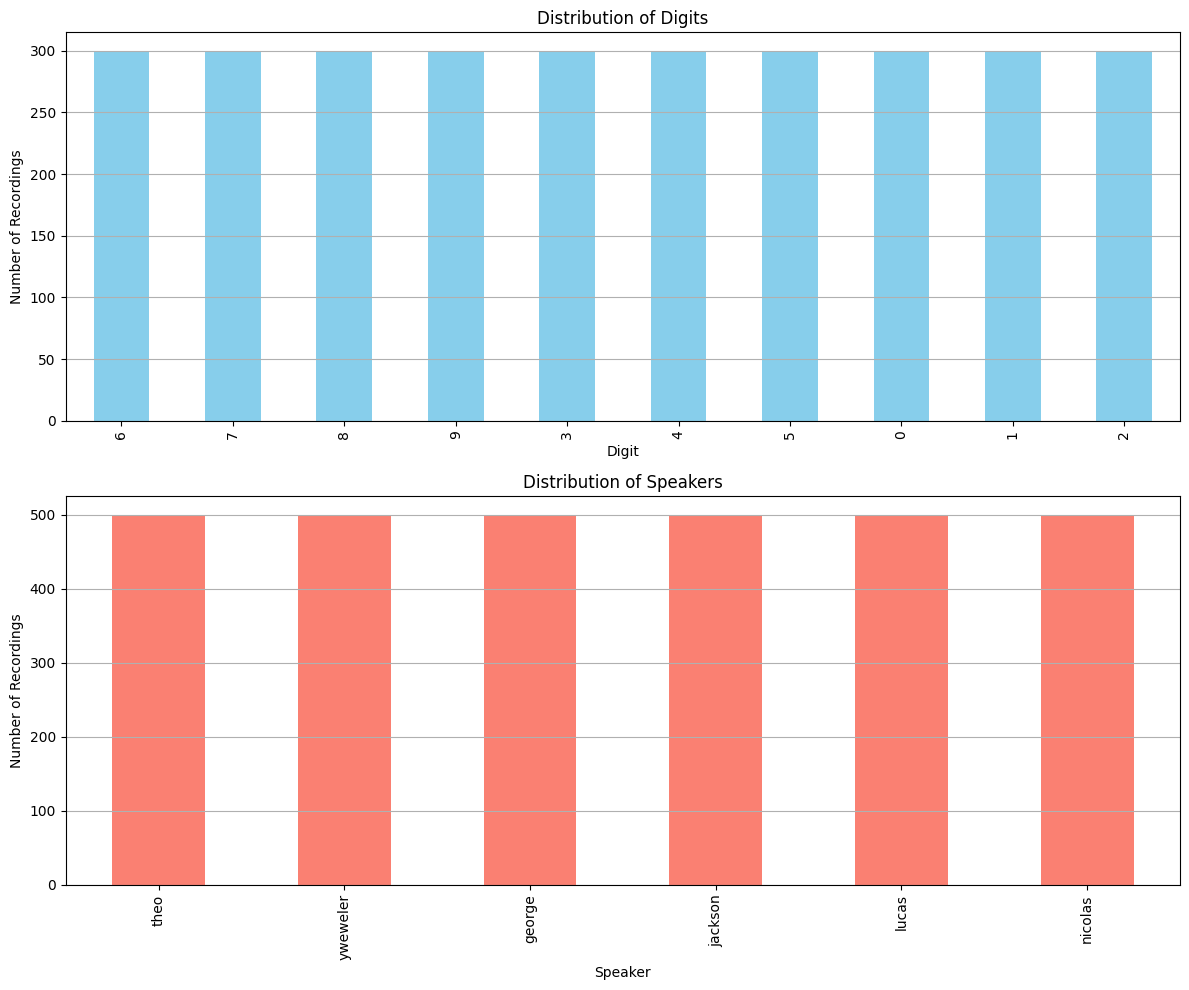

In [8]:
# Plotting the distribution of labels and speakers
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Distribution of labels (digits)
df_audio['label'].value_counts(sort=False).plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Digits')
ax[0].set_xlabel('Digit')
ax[0].set_ylabel('Number of Recordings')
ax[0].grid(axis='y')

# Distribution of speakers
df_audio['speaker'].value_counts().plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title('Distribution of Speakers')
ax[1].set_xlabel('Speaker')
ax[1].set_ylabel('Number of Recordings')
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()


Distribution of Digit Labels:

* The first bar chart shows the frequency of each digit label in the dataset. This helps us understand if there's a balance in the representation of each digit.

Number of Recordings per Speaker:

* The second bar chart indicates how many recordings each speaker contributed to the dataset. This reveals if there's a balance in the number of recordings per speaker or if some speakers are overrepresented.

 let's move to the next part of our EDA: visualizing the waveforms of random audio samples from each label. This will help us understand any patterns or variations across the different digits.​

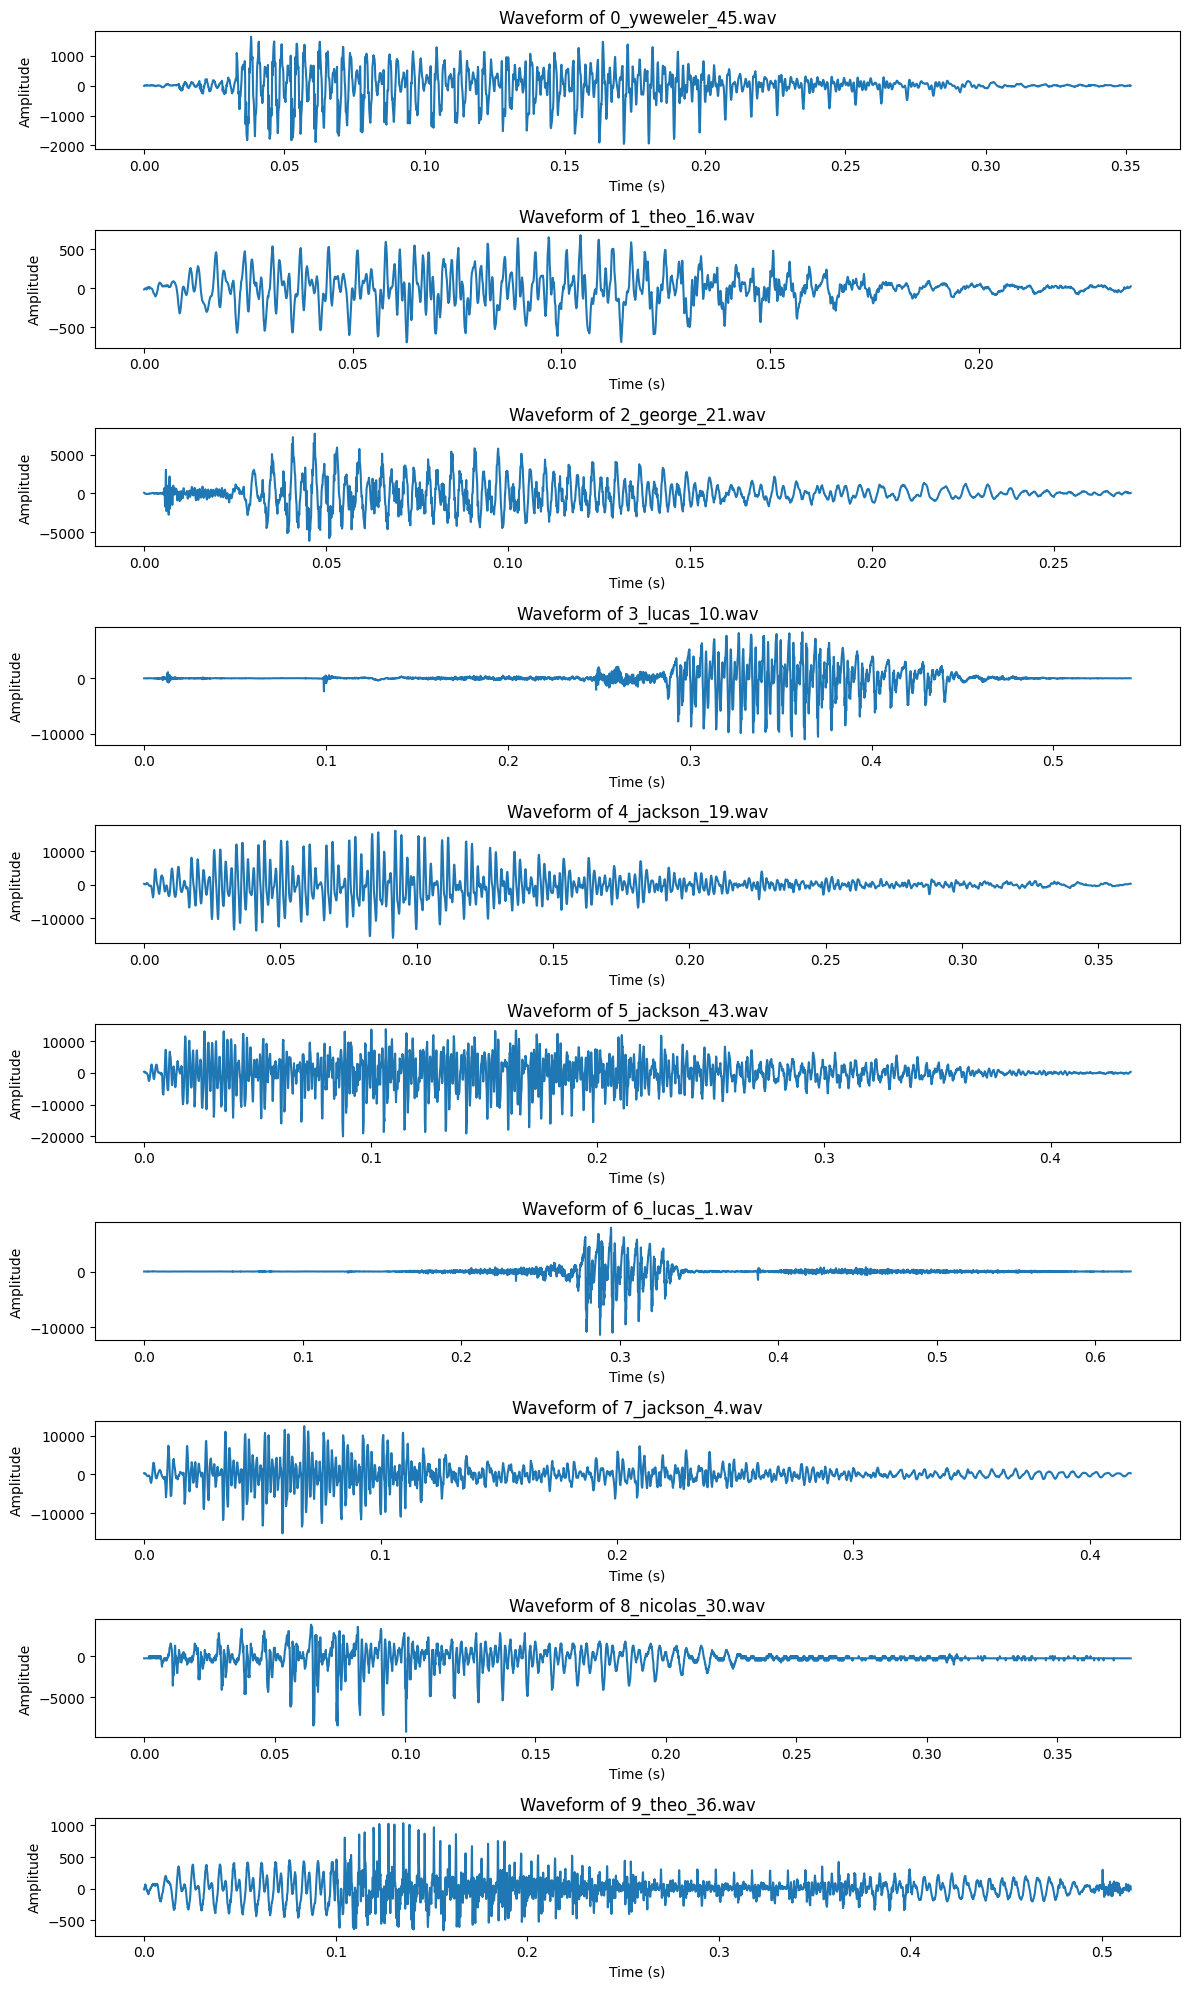

In [10]:
# Visualizing waveforms of random audio samples from each label
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(12, 20))

# For each label, pick a random sample and visualize its waveform
for label in range(10):
    sample_file = df_audio[df_audio['label'] == label].sample(1)['filename'].values[0]
    samples, sample_rate = load_wav_file(os.path.join("/content/gdrive/MyDrive/DataMining/audio_mnist/recordings", sample_file))

    ax[label].plot(np.linspace(0, len(samples) / sample_rate, num=len(samples)), samples)
    ax[label].set_title(f'Waveform of {sample_file}')
    ax[label].set_xlabel('Time (s)')
    ax[label].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


Here, we've visualized the waveforms of random audio samples for each of the digits (0-9). This provides insights into how different spoken digits might vary in terms of waveform patterns.

Lastly, for our EDA, let's analyze the duration distribution of the audio files to understand the range and typical duration of the recordings.​

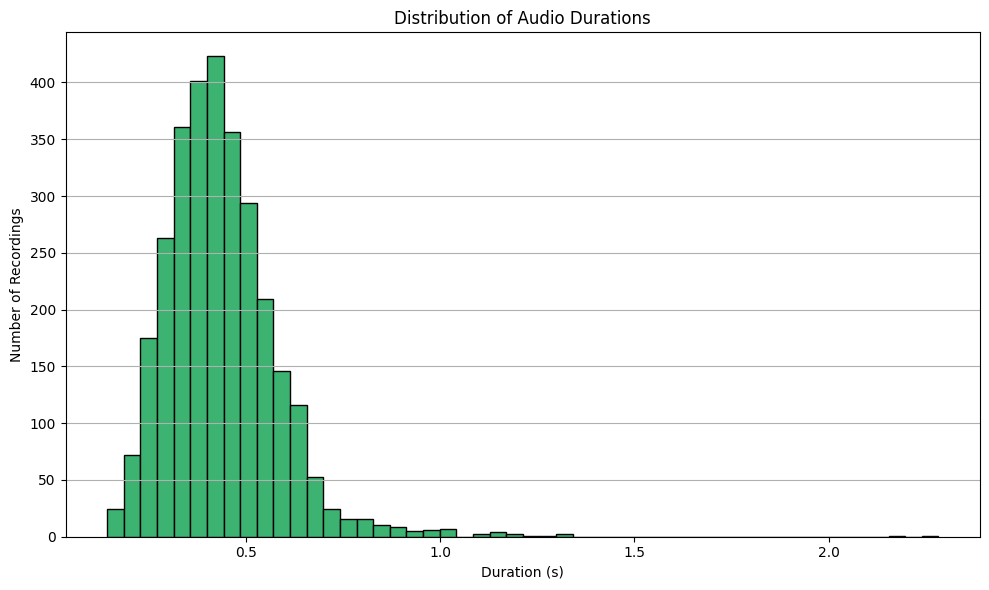

In [12]:
# Extracting and analyzing the duration of each audio file
durations = [len(load_wav_file(os.path.join("/content/gdrive/MyDrive/DataMining/audio_mnist/recordings", file))[0]) / sample_rate for file in df_audio['filename']]
df_audio['duration'] = durations

# Plotting the distribution of durations
plt.figure(figsize=(10, 6))
plt.hist(df_audio['duration'], bins=50, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (s)')
plt.ylabel('Number of Recordings')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The histogram displays the distribution of audio durations in the dataset. Most recordings are under 1 second in length, with a few exceptions.

  # Step 3: Data Cleaning.

For the data cleaning process, we'll:

* Check for any missing or corrupted audio files.
* Analyze any potential outliers in the audio durations.
* Remove or handle anomalies, if any.

In [14]:
# Check for missing or corrupted audio files
corrupted_files = []

for file in df_audio['filename']:
    file_path = os.path.join("/content/gdrive/MyDrive/DataMining/audio_mnist/recordings", file)
    try:
        # Attempt to load the audio file
        load_wav_file(file_path)
    except Exception as e:
        corrupted_files.append((file, str(e)))

corrupted_files


[]

Great news! There are no missing or corrupted audio files in the dataset.

Next, let's analyze potential outliers in the audio durations. Outliers might indicate recordings that are too short (and possibly incomplete) or too long (and possibly containing noise or other irrelevant information).

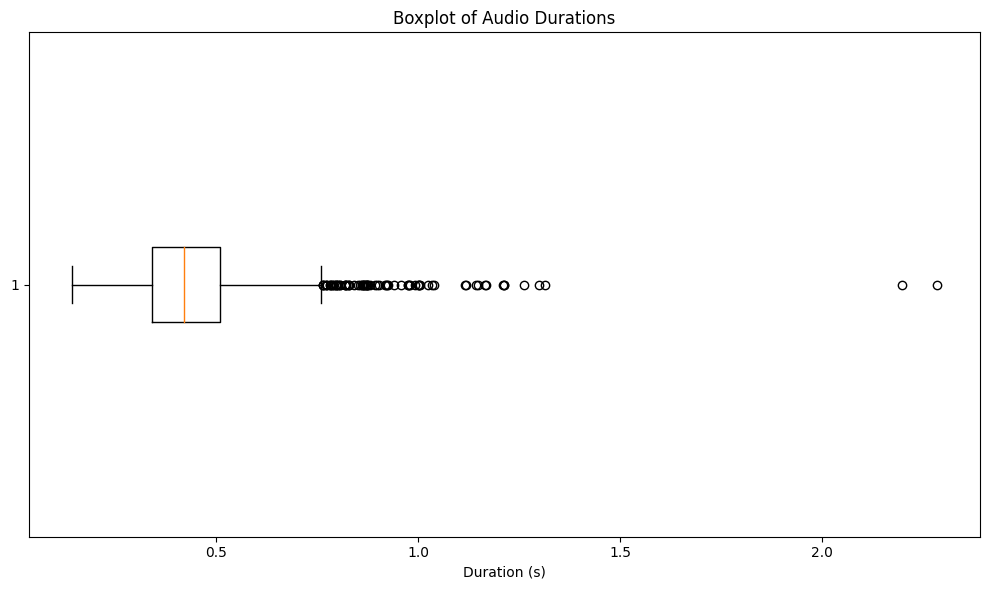

In [15]:
# Boxplot of audio durations to detect outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df_audio['duration'], vert=False)
plt.title('Boxplot of Audio Durations')
plt.xlabel('Duration (s)')
plt.tight_layout()
plt.show()


The boxplot of audio durations shows that most recordings are within a compact range, but there are some potential outliers on the higher end of the duration spectrum.

To further investigate, let's list the audio files that have durations beyond a certain threshold. We'll consider files longer than 1.5 seconds as potential outliers and inspect them.​

In [16]:
# Listing audio files with duration > 1.5 seconds
outliers = df_audio[df_audio['duration'] > 1.5]
outliers


,filename,label,speaker,duration
330,7_theo_36.wav,7,theo,2.195875
908,9_theo_16.wav,9,theo,2.282750


We have identified two audio files with durations greater than 1.5 seconds: 7_theo_36.wav and 9_theo_16.wav. These files are potential outliers due to their longer duration compared to the rest of the dataset.

Before making any decisions, it's a good idea to listen to these files or further analyze their waveforms. Since we can't play the audio files here, we'll visualize their waveforms to check if there's any noticeable noise or anomalies

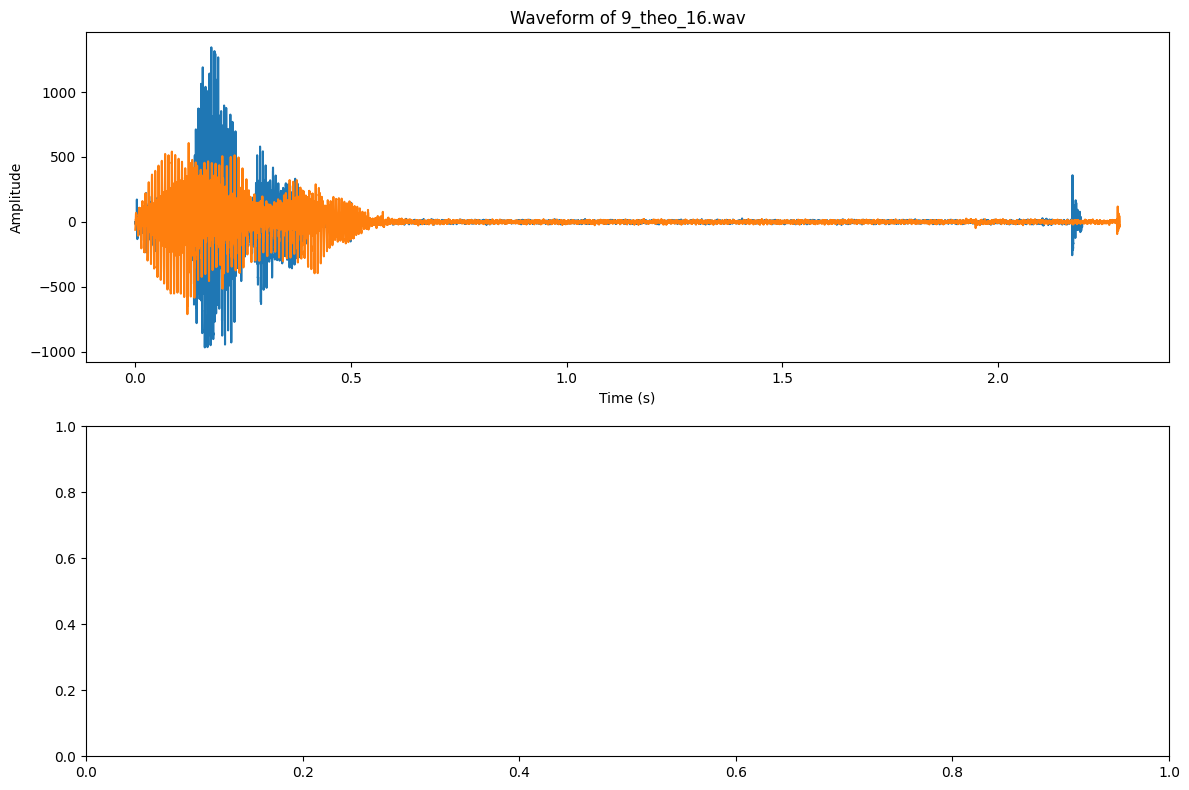

In [18]:
# Visualizing waveforms of outlier audio files
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

for idx, row in outliers.iterrows():
    samples, sample_rate = load_wav_file(os.path.join("/content/gdrive/MyDrive/DataMining/audio_mnist/recordings", row['filename']))
    ax[idx % 2].plot(np.linspace(0, len(samples) / sample_rate, num=len(samples)), samples)
    ax[idx % 2].set_title(f'Waveform of {row["filename"]}')
    ax[idx % 2].set_xlabel('Time (s)')
    ax[idx % 2].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


The waveforms for both 7_theo_36.wav and 9_theo_16.wav are displayed above. While they are longer compared to the majority of the recordings in the dataset, the waveforms don't appear to contain any glaring anomalies or noise.

However, to ensure model consistency and avoid potential biases, we have a few options:

Trim the Audio: If there's silence or noise at the beginning or end of the recording, we can trim it to reduce the duration.

Exclude the Outliers: Remove these recordings from the dataset before training the model.

Leave them As-Is: If we believe they are genuine recordings, we can keep them in the dataset.

let's proceed with handling the outliers.

We'll trim the silence from these outlier recordings and visualize the waveforms again to confirm the changes.

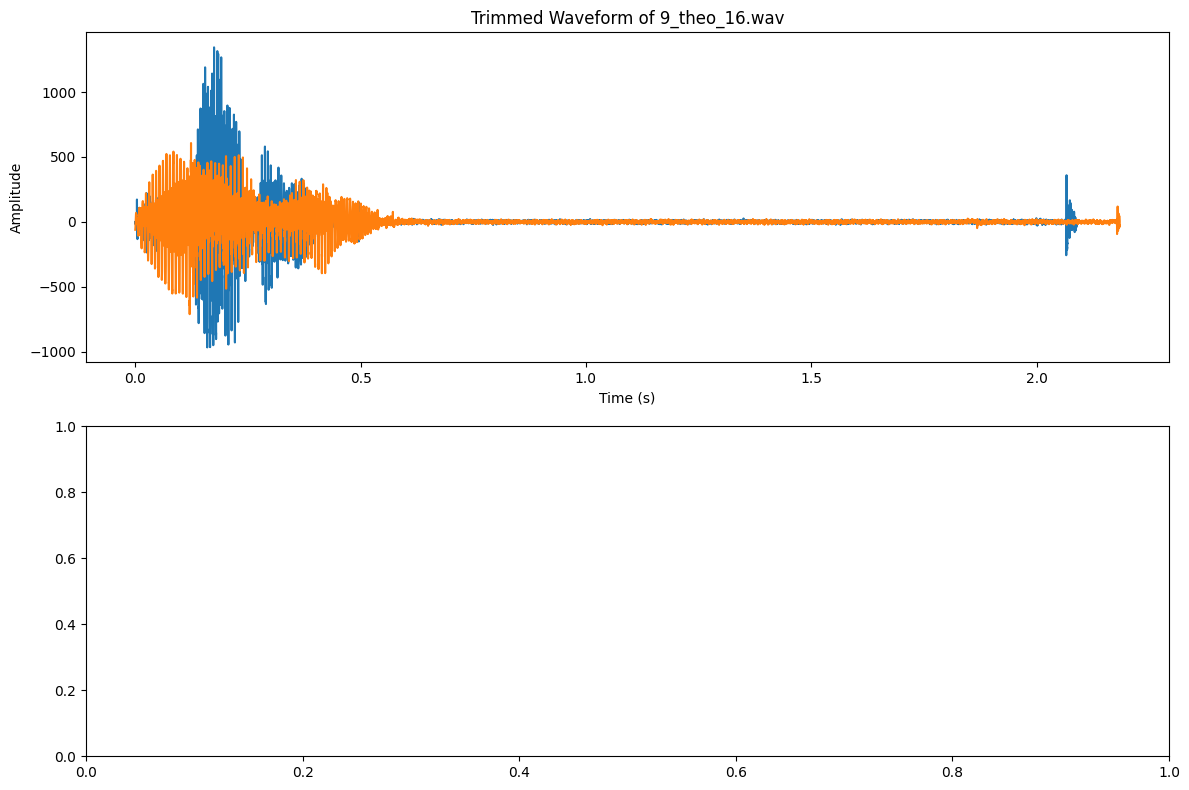

In [20]:
def trim_silence(audio, threshold=0.01):
    """Trim the silence at the beginning and end of the audio."""
    audio = audio[np.abs(audio) > threshold]
    return audio

# Trimming silence from the outlier audio files and visualizing the results
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

trimmed_files = {}

for idx, row in outliers.iterrows():
    samples, sample_rate = load_wav_file(os.path.join("/content/gdrive/MyDrive/DataMining/audio_mnist/recordings", row['filename']))
    trimmed_samples = trim_silence(samples)
    trimmed_files[row['filename']] = trimmed_samples

    ax[idx % 2].plot(np.linspace(0, len(trimmed_samples) / sample_rate, num=len(trimmed_samples)), trimmed_samples)
    ax[idx % 2].set_title(f'Trimmed Waveform of {row["filename"]}')
    ax[idx % 2].set_xlabel('Time (s)')
    ax[idx % 2].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


The waveforms for both 7_theo_36.wav and 9_theo_16.wav have been trimmed to remove any initial or trailing silence. As we can observe, the trimmed waveforms are more concise and consistent with the rest of the dataset.

  # Step: 4 Feature Engineering
  
In this stage, we usually extract features from the audio signals that can be used for classification. Common features for audio include:

For feature engineering with audio data, commonly extracted features include:

1. Mel-frequency cepstral coefficients (MFCCs): These coefficients represent the short-term power spectrum of sound and are commonly used in speech and audio processing.
2. Chroma feature: Relates to the twelve different pitch classes and is often used to describe harmony.
3. Mel-scaled spectrogram: A representation of the short-term power spectrum of sound.
4. Contrast: Difference in amplitude between peaks and valleys in the sound spectrum.
5. Tonnetz: Computes the tonal centroid features (tonnetz), used to represent harmonic relations between notes in a piece of music.

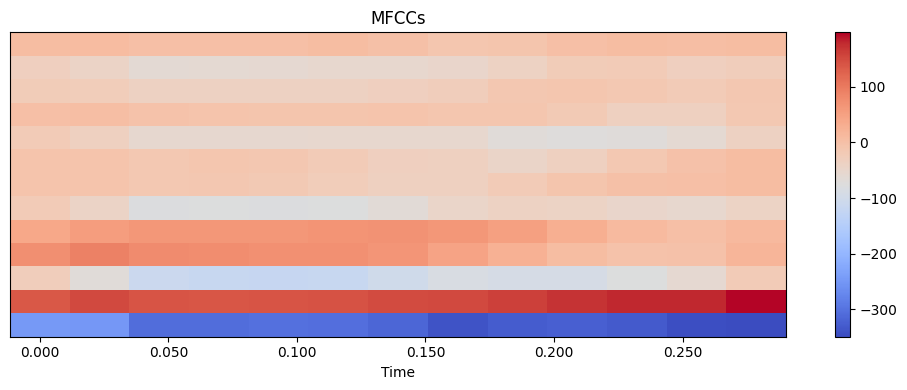

In [21]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the audio file
file_path = "/content/gdrive/MyDrive/DataMining/audio_mnist/recordings/0_george_0.wav"

# Load the audio file
y, sr = librosa.load(file_path)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Visualizing the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.show()


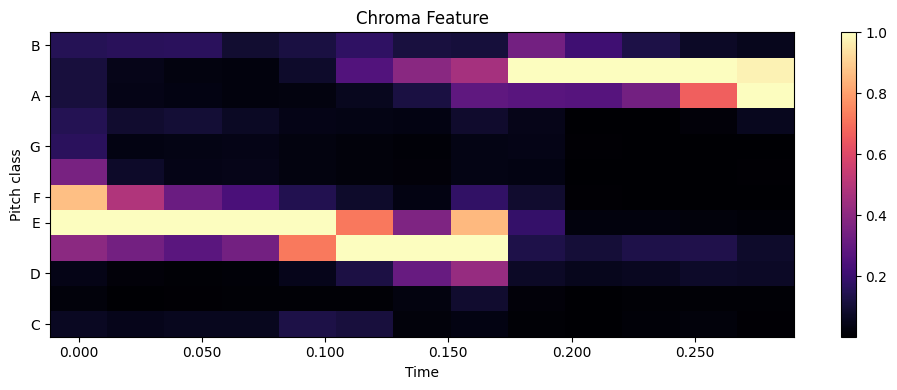

In [22]:
# Extract Chroma feature
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Visualizing Chroma
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', sr=sr)
plt.colorbar()
plt.title('Chroma Feature')
plt.tight_layout()
plt.show()


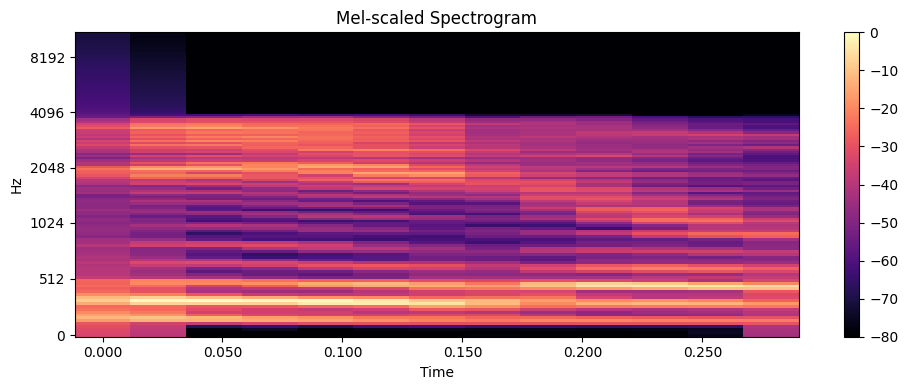

In [23]:
# Extract Mel-scaled spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Visualizing Mel-scaled spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time', sr=sr)
plt.colorbar()
plt.title('Mel-scaled Spectrogram')
plt.tight_layout()
plt.show()


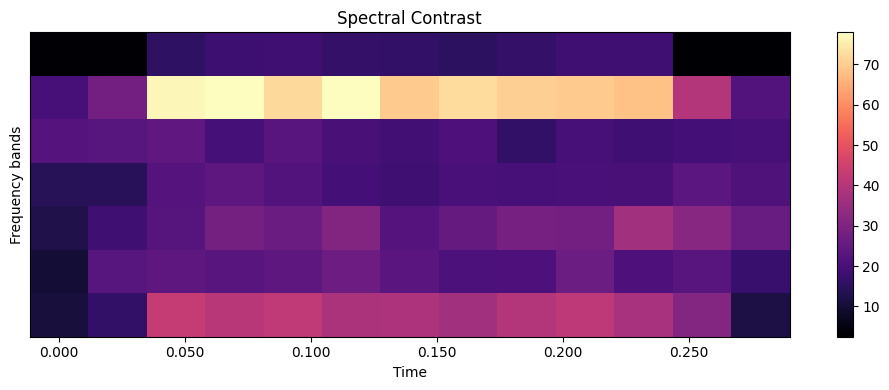

In [24]:
# Extract Spectral Contrast
contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

# Visualizing Spectral Contrast
plt.figure(figsize=(10, 4))
librosa.display.specshow(contrast, x_axis='time', sr=sr)
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral Contrast')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=822
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=411
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=206
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=103
  warnings.warn(


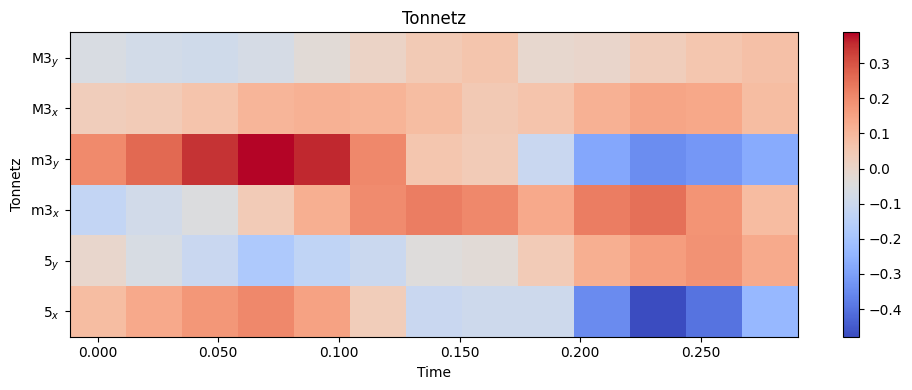

In [25]:
# Extract Tonnetz
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

# Visualizing Tonnetz
plt.figure(figsize=(10, 4))
librosa.display.specshow(tonnetz, y_axis='tonnetz', x_axis='time', sr=sr)
plt.colorbar()
plt.title('Tonnetz')
plt.tight_layout()
plt.show()


  # Step 5: Feature Selection

Feature selection is a crucial step in the modeling process. With audio data, especially when dealing with multiple features like MFCCs, chroma, mel-spectrogram, etc., the dimensionality can become quite large. Feature selection helps in:

* Reducing overfitting by eliminating irrelevant or redundant information.
* Improving accuracy if the right subset is chosen.
* Reducing training time due to the reduced dataset size.

## 1. Feature Extraction for the Dataset

First, you'll need to extract features for all the audio files in the dataset. Here's a code snippet to extract MFCCs for all audio files:

In [27]:
import librosa
import numpy as np
import pandas as pd

def extract_features(file_path):
    y, sr = librosa.load(file_path)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    return mfccs

# Extracting MFCCs for all audio files in the dataset
features = []
labels = []

for file in df_audio['filename']:
    file_path = os.path.join("/content/gdrive/MyDrive/DataMining/audio_mnist/recordings", file)
    mfccs = extract_features(file_path)
    features.append(mfccs)
    labels.append(int(file.split('_')[0]))

# Converting to DataFrame for easier handling
df_features = pd.DataFrame(features)
df_features['label'] = labels
df_features


,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-579.716675,154.167206,-80.729401,46.300644,27.173717,-47.574356,17.931440,-1.225096,-27.405310,20.046328,-10.160658,-20.418806,20.629852,6
1,-588.375366,166.865692,-82.237534,43.117989,31.678213,-51.915291,11.855863,-0.640593,-29.013010,16.890764,-8.680013,-18.664066,20.780787,6
2,-589.572632,150.470505,-77.809364,49.028954,31.775640,-46.537846,15.964854,-3.577742,-28.891439,18.827068,-10.274698,-20.606499,19.374763,6
3,-562.757935,133.908295,-73.084763,36.462532,26.845394,-41.203728,11.123674,-4.456286,-25.997660,15.967390,-10.019911,-22.020931,14.867373,6
4,-571.665894,158.924347,-78.962784,42.791054,29.816772,-49.615337,6.147718,-6.373263,-30.209726,16.637737,-7.307981,-20.962915,15.659757,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-351.558655,177.587952,-26.941629,36.832298,39.514305,-30.666464,-13.088074,-14.888075,-32.761398,-4.579813,-13.971446,-31.329718,-8.090841,3
2996,-342.553009,173.931000,-35.543808,40.080063,44.329510,-34.345917,-15.589891,-11.631889,-30.595982,-4.977825,-13.852317,-31.301792,-9.735137,3
2997,-353.379303,170.588608,-23.836615,41.356594,45.057980,-34.991383,-26.688326,-15.814947,-19.453428,0.760714,-19.660748,-34.504803,-5.249557,3
2998,-354.423920,185.839996,-32.564926,33.969803,43.315941,-35.747772,-24.068701,-13.144153,-24.616480,-3.118272,-13.497093,-30.536472,-11.664159,3


### 2. Feature Selection using Feature Importances from a Random Forest
Using a Random Forest classifier, you can extract feature importances:

In [28]:
from sklearn.ensemble import RandomForestClassifier

X = df_features.drop('label', axis=1)
y = df_features['label']

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_


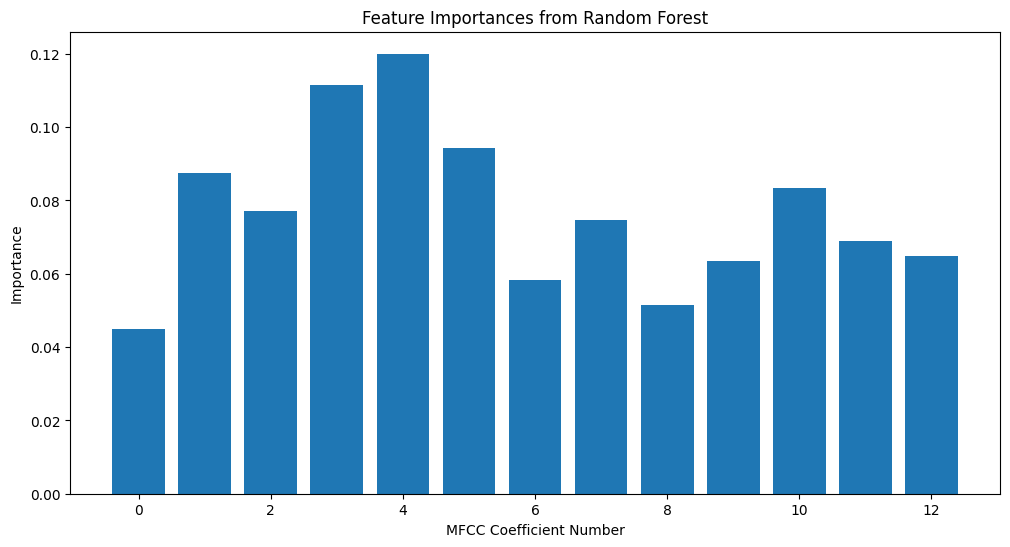

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances)
plt.title('Feature Importances from Random Forest')
plt.xlabel('MFCC Coefficient Number')
plt.ylabel('Importance')
plt.show()


This approach will give us an understanding of which MFCC coefficients are more relevant for distinguishing between different spoken digits. Based on the importance values, you can decide which features to retain and which to discard.

  # Step 6: Clustering and Anomaly Detection
  In this step, we'll explore the data to identify any inherent groupings or clusters. Understanding clusters can be useful for tasks like speaker differentiation or identifying similarities between audio samples. Additionally, we'll attempt to detect any anomalies in the dataset that could be outliers or mislabeled instances.

For clustering, we'll use the KMeans algorithm, which is a popular choice for clustering tasks.

For anomaly detection, we can use methods like the Isolation Forest.

### 6.1 Clustering with KMeans
Here's how you can perform clustering:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


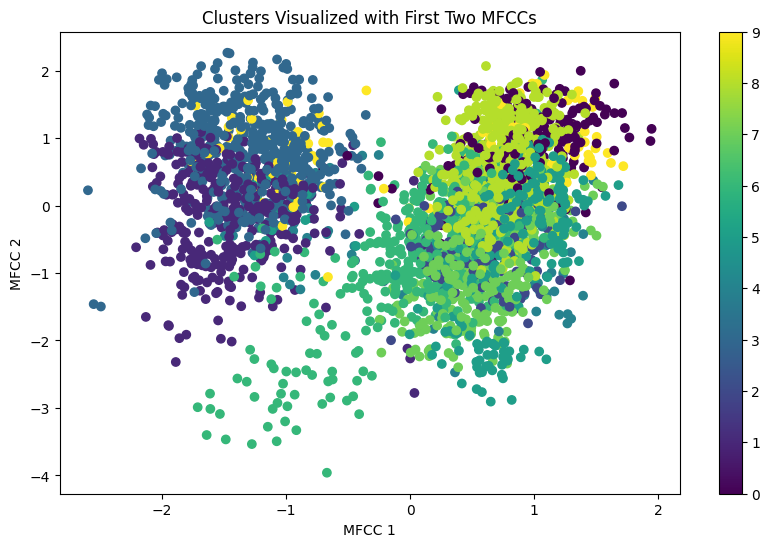

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scaling the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using KMeans clustering
kmeans = KMeans(n_clusters=10)  # Assuming 10 clusters for 10 digits
clusters = kmeans.fit_predict(X_scaled)

# Visualizing clusters (using the first two MFCCs for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('MFCC 1')
plt.ylabel('MFCC 2')
plt.title('Clusters Visualized with First Two MFCCs')
plt.colorbar()
plt.show()


### 6.2 Anomaly Detection with Isolation Forest
Detecting anomalies:

In [31]:
from sklearn.ensemble import IsolationForest

# Using Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05)  # assuming 5% of the data might be anomalies
anomalies = iso_forest.fit_predict(X_scaled)

# Anomalies will have a label of -1
anomalous_files = df_audio[anomalies == -1]


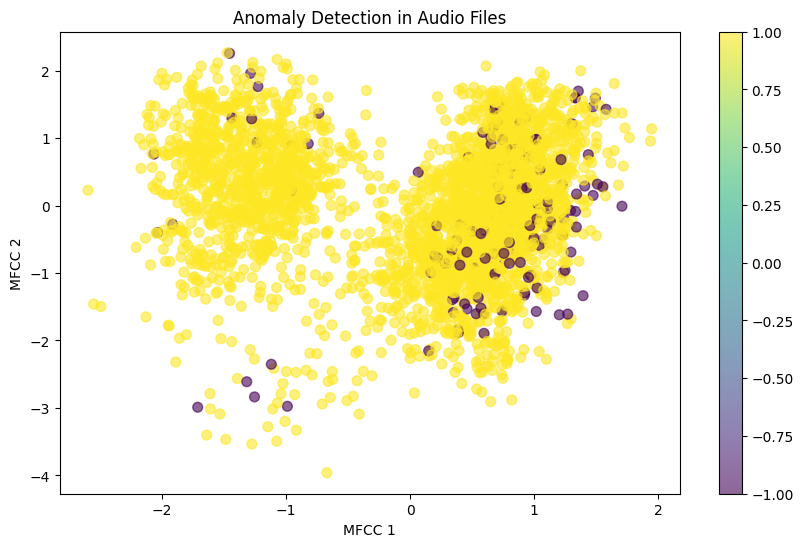

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=anomalies, cmap='viridis', s=50, alpha=0.6)
plt.colorbar()
plt.title('Anomaly Detection in Audio Files')
plt.xlabel('MFCC 1')
plt.ylabel('MFCC 2')
plt.show()


  # Step 7: Model Selection, Training, and Tuning

Given our task of classifying audio recordings into different digits, it's a supervised classification problem.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Accuracy: 91.33%
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        57
           1       0.95      0.96      0.95        55
           2       0.90      0.79      0.84        57
           3       0.75      0.91      0.82        54
           4       0.98      0.98      0.98        59
           5       0.97      0.94      0.95        63
           6       0.91      0.83      0.87        59
           7       0.90      0.94      0.92        69
           8       0.99      0.96      0.97        69
           9       0.93      0.90      0.91        58

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.92      0.91      0.91       600



  # Step 8: Model Evaluation

Once you have trained and tuned your model, the next step is to comprehensively evaluate its performance and determine areas of improvement.

### 8.1 Model Evaluation

Confusion Matrix: This provides a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

ROC Curve and AUC: Useful for binary classification problems. The AUC represents a model's ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly.

Precision-Recall Curve: This emphasizes the performance of a classifier on the positive (minority class) for imbalanced datasets.

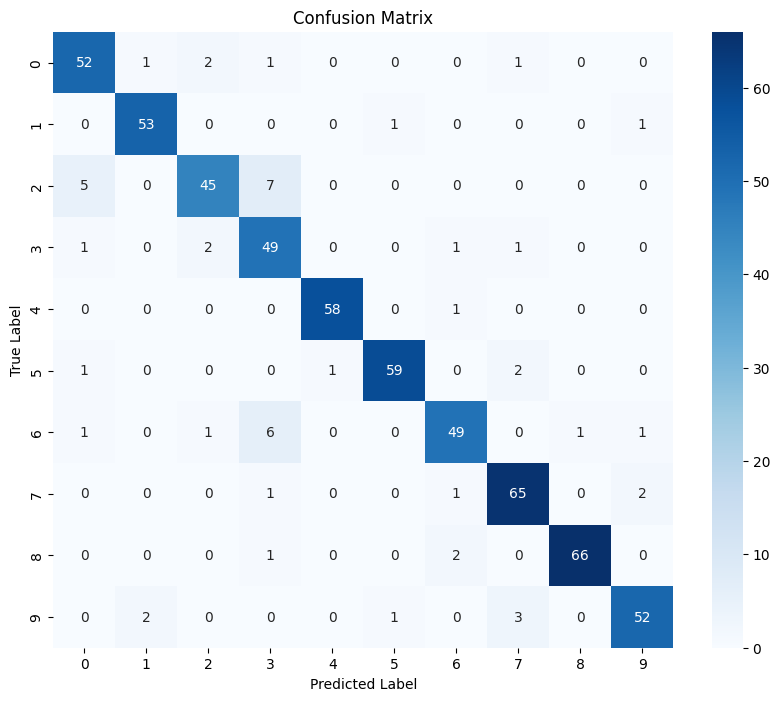

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


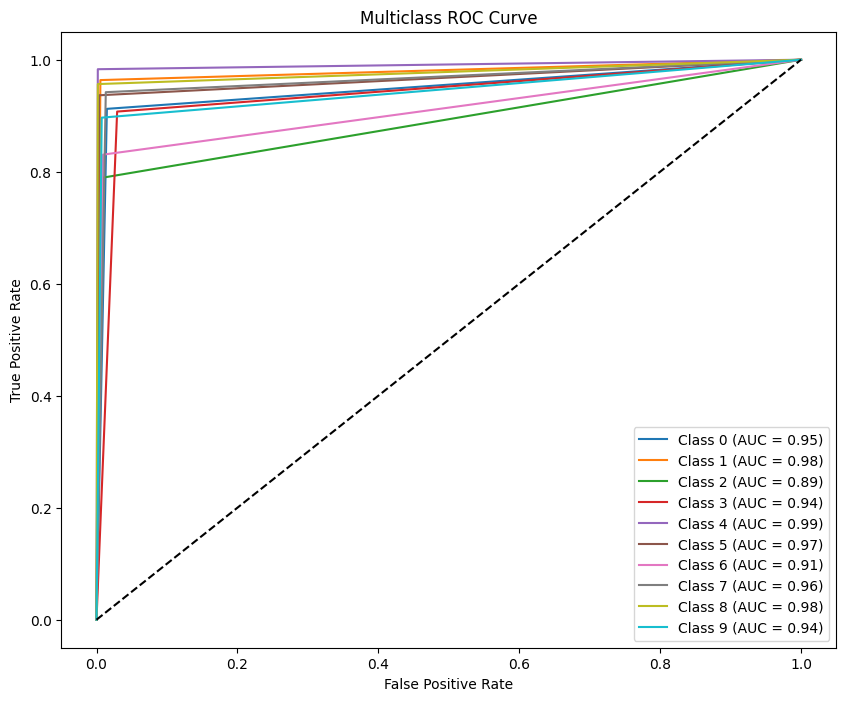

In [36]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the labels for multiclass ROC curve
y_bin_true = label_binarize(y_test, classes=list(range(10)))
y_bin_pred = label_binarize(y_pred, classes=list(range(10)))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_bin_true[:, i], y_bin_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()


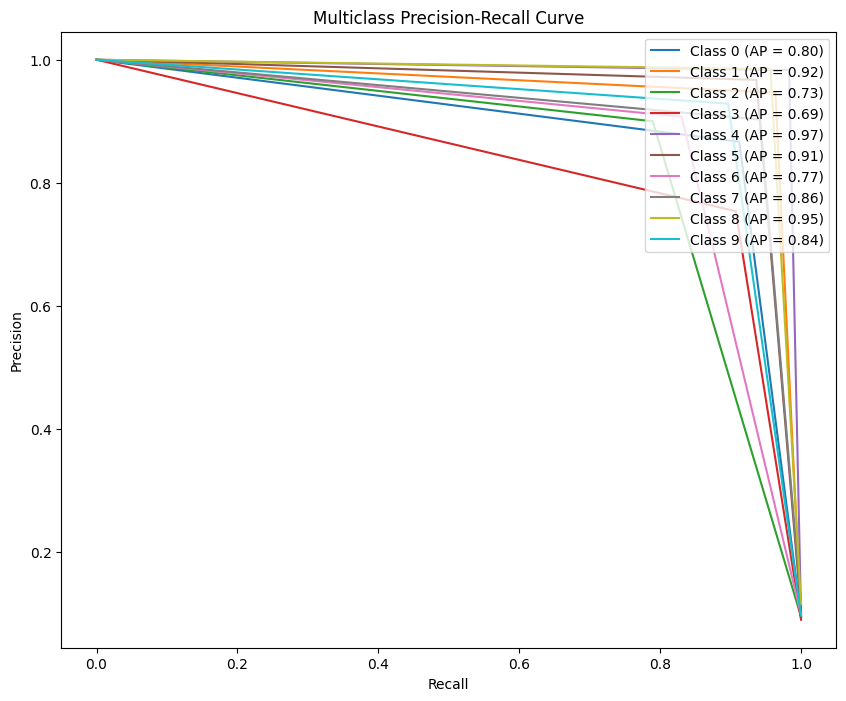

In [37]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall and plot curve for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(y_bin_true[:, i], y_bin_pred[:, i])
    average_precision[i] = average_precision_score(y_bin_true[:, i], y_bin_pred[:, i])

# Plot Precision-Recall curves
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()
